In [1]:
# Load dependancies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
from matplotlib import cm

In [2]:
# Get the colormap and extract several colors
viridis = cm.get_cmap('viridis', 21)

In [3]:
#Save path to data set in a variable
project_one = "Resources/project_one_data.csv"

In [4]:
# Read in data frame
project_one_df = pd.read_csv(project_one)
project_one_df

,Unnamed: 0,Serial Number,State,Transportation,Wages,Education,Parent Origin,Age,Internet,Region,Laptop,# of Vehicles
0,0,84,1,NaN,0.0,19.0,0.0,19,NaN,3,NaN,NaN
1,1,154,1,1.0,52000.0,20.0,0.0,55,1.0,3,1.0,3.0
2,2,154,1,11.0,0.0,16.0,0.0,56,1.0,3,1.0,3.0
3,3,154,1,NaN,0.0,19.0,0.0,21,1.0,3,1.0,3.0
4,4,154,1,NaN,0.0,19.0,0.0,21,1.0,3,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2582037,3132789,1490418,56,NaN,0.0,16.0,0.0,86,3.0,4,2.0,0.0
2582038,3132790,1490639,56,1.0,50000.0,20.0,0.0,59,1.0,4,1.0,1.0
2582039,3132791,1490649,56,NaN,6600.0,20.0,0.0,58,NaN,4,NaN,NaN
2582040,3132792,1491926,56,1.0,600.0,21.0,0.0,29,1.0,4,1.0,2.0


In [5]:
# create a list
def counter_wage(wage_count):

    counter = 0

    
    for wages in wage_count['Wages']: 

        if wages >0: 
            counter = counter+1
            
    return counter

wage_count = [0, 52000, 0, 0, 2500]

In [6]:
count_by_serno = project_one_df.groupby('Serial Number').count()

In [7]:
# test_df = project_one_df.iloc[:400]
pone_wage_count_by_serial_number = project_one_df.groupby("Serial Number").apply(counter_wage)

In [8]:
ser_num_wage_count = pone_wage_count_by_serial_number.rename("Wage Count").to_frame()

In [9]:
merged_df = pd.merge(count_by_serno, ser_num_wage_count, left_index=True, right_index=True)[["Wages", "Wage Count", 'State']].rename(columns={'Wages': 'Household Head Count'})
merged_df

,Household Head Count,Wage Count,State
Serial Number,,,
1,5,2,5
2,2,2,2
3,2,2,2
4,1,0,1
5,4,4,4
...,...,...,...
1492838,3,3,3
1492840,2,1,2
1492841,2,2,2


In [10]:
# Generate a summary statistics table around household income

# Use groupby and summary statistical method to calculate the following stats of each household income: 
merged_dfx = merged_df.groupby('Household Head Count')

# Stats
merged_dfx_sum = merged_dfx['Wage Count'].sum()
merged_dfx_max = merged_dfx['Wage Count'].max()
merged_dfx_min = merged_dfx['Wage Count'].min()
merged_dfx_mean = merged_dfx['Wage Count'].mean()
merged_dfx_median = merged_dfx['Wage Count'].median()
merged_dfx_variance = merged_dfx['Wage Count'].var()
merged_dfx_stdev = merged_dfx['Wage Count'].std()
merged_dfx_sem = merged_dfx['Wage Count'].sem()

# Assemble the resulting series into a single summary dataframe.
merged_dfx = pd.DataFrame({'Wage Count Sum': merged_dfx_sum, 
                            'Wage Count Max': merged_dfx_max, 
                            'Wage Count Min': merged_dfx_min,
                            'Wage Count Mean': merged_dfx_mean, 
                            'Wage Count Median': merged_dfx_median, 
                            'Wage Count Variance': merged_dfx_variance,
                            'Wage Count Standard Deviation': merged_dfx_stdev, 
                            'Wage Count SEM': merged_dfx_sem})

merged_dfx

,Wage Count Sum,Wage Count Max,Wage Count Min,Wage Count Mean,Wage Count Median,Wage Count Variance,Wage Count Standard Deviation,Wage Count SEM
Household Head Count,,,,,,,,
1,243447,1,0,0.474888,0.0,0.249370,0.499369,0.000697
2,713087,2,0,1.207860,1.0,0.622946,0.789269,0.001027
3,303508,3,0,1.844181,2.0,0.825278,0.908448,0.002239
4,157697,4,0,2.437658,2.0,1.190453,1.091079,0.004290
5,52037,5,0,2.924248,3.0,1.674153,1.293891,0.009699
6,16242,6,0,3.305250,3.0,2.197868,1.482521,0.021149
7,5277,7,0,3.708363,4.0,2.765099,1.662859,0.044081
8,2019,8,0,4.241597,4.0,3.564666,1.888032,0.086538
9,863,9,0,4.542105,5.0,4.101392,2.025189,0.146923


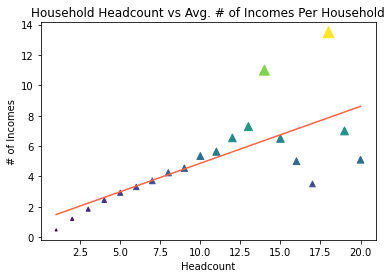

The correlation between household head count and number of incomes is strong at 0.71.


In [11]:
## Generate a scatter plot showing household head count vs average number of incomes per hh
x = merged_dfx.index
y = merged_dfx['Wage Count Mean']

# Calculate the correlation coefficient
correlation = st.pearsonr(x, y)

# # # Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # Annotate the linear regression
# plt.annotate(line_eq,(100000.0, 20),fontsize=12,color="tomato")

# Create the plot
plt.scatter(x, y, marker='^', c=merged_dfx['Wage Count Mean'], s = merged_dfx['Wage Count Mean']*9, cmap='viridis')
plt.plot(x,regress_values,"r-", color="tomato")
# plt.colorbar()
plt.title('Household Headcount vs Avg. # of Incomes Per Household')
plt.xlabel('Headcount')
plt.ylabel('# of Incomes')

# Save and show
plt.savefig("Images/headcount_vs_num_of_income_scatter.png")
plt.show()

print(f"The correlation between household head count and number of incomes is strong at {round(correlation[0],2)}.")

In [12]:
# Rename "serial humber" as "Household"
project_one_hh = project_one_df.rename(columns = {'Serial Number': 'Household'})
project_one_hh

,Unnamed: 0,Household,State,Transportation,Wages,Education,Parent Origin,Age,Internet,Region,Laptop,# of Vehicles
0,0,84,1,NaN,0.0,19.0,0.0,19,NaN,3,NaN,NaN
1,1,154,1,1.0,52000.0,20.0,0.0,55,1.0,3,1.0,3.0
2,2,154,1,11.0,0.0,16.0,0.0,56,1.0,3,1.0,3.0
3,3,154,1,NaN,0.0,19.0,0.0,21,1.0,3,1.0,3.0
4,4,154,1,NaN,0.0,19.0,0.0,21,1.0,3,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2582037,3132789,1490418,56,NaN,0.0,16.0,0.0,86,3.0,4,2.0,0.0
2582038,3132790,1490639,56,1.0,50000.0,20.0,0.0,59,1.0,4,1.0,1.0
2582039,3132791,1490649,56,NaN,6600.0,20.0,0.0,58,NaN,4,NaN,NaN
2582040,3132792,1491926,56,1.0,600.0,21.0,0.0,29,1.0,4,1.0,2.0


In [13]:
# Generate a summary statistics table around household income

# Use groupby and summary statistical method to calculate the following stats of each household income: 
p_one_hh = project_one_hh.groupby('Household')

# Stats
p_one_hh_count = p_one_hh['Household'].count()
p_one_hh_sum = p_one_hh['Wages'].sum()
p_one_hh_max = p_one_hh['Wages'].max()
p_one_hh_min = p_one_hh['Wages'].min()
p_one_hh_mean = p_one_hh['Wages'].mean()
p_one_hh_median = p_one_hh['Wages'].median()
p_one_hh_variance = p_one_hh['Wages'].var()
p_one_hh_stdev = p_one_hh['Wages'].std()
p_one_hh_sem = p_one_hh['Wages'].sem()

# Assemble the resulting series into a single summary dataframe.
p_one_hh = pd.DataFrame({'HH Headcount': p_one_hh_count, 
                            'HH Income': p_one_hh_sum, 
                            'HH Income Max': p_one_hh_max, 
                            'HH Income Min': p_one_hh_min,
                            'HH Income Mean': p_one_hh_mean, 
                            'HH Income Median': p_one_hh_median, 
                            'HH Income Variance': p_one_hh_variance,
                            'HH Income Standard Deviation': p_one_hh_stdev, 
                            'HH Income SEM': p_one_hh_sem})

p_one_hh

,HH Headcount,HH Income,HH Income Max,HH Income Min,HH Income Mean,HH Income Median,HH Income Variance,HH Income Standard Deviation,HH Income SEM
Household,,,,,,,,,
1,5,79300.0,42000.0,0.0,15860.000000,0.0,4.743980e+08,21780.679512,9740.615997
2,2,109000.0,59000.0,50000.0,54500.000000,54500.0,4.050000e+07,6363.961031,4500.000000
3,2,45000.0,25000.0,20000.0,22500.000000,22500.0,1.250000e+07,3535.533906,2500.000000
4,1,0.0,0.0,0.0,0.000000,0.0,NaN,NaN,NaN
5,4,29000.0,16000.0,4000.0,7250.000000,4500.0,3.425000e+07,5852.349955,2926.174978
...,...,...,...,...,...,...,...,...,...
1492838,3,175000.0,120000.0,7000.0,58333.333333,48000.0,3.272333e+09,57204.312192,33026.925043
1492840,2,100000.0,100000.0,0.0,50000.000000,50000.0,5.000000e+09,70710.678119,50000.000000
1492841,2,53000.0,38000.0,15000.0,26500.000000,26500.0,2.645000e+08,16263.455967,11500.000000


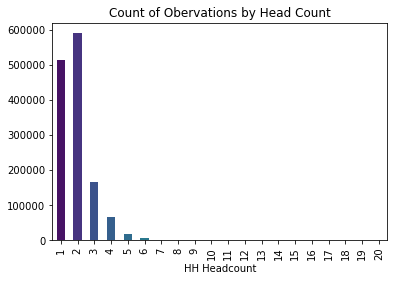

In [14]:
# Count the number of plots by headcount in a bar chart
colors =[viridis.colors[1],viridis.colors[3],viridis.colors[5],viridis.colors[6],viridis.colors[7],viridis.colors[8]]

# ax = p_one_hh.groupby('HH Head Count').count()["HH Income"].plot(kind='bar', cmap='viridis')
ax = p_one_hh.groupby('HH Headcount').count()["HH Income"].plot(kind='bar', color=colors)
ax.set_title('Count of Obervations by Head Count')
plt.savefig("Images/hh_headcount_bar.png")

In [15]:
merged_df.groupby('Household Head Count').mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7ff7f5616520>>

In [17]:
# Generate a summary statistics table around household income

# Use groupby and summary statistical method to calculate the following stats of each household income: 
p_one_hhxxx = p_one_hh.groupby('HH Headcount')

# Stats
p_one_hhxxx_mean = p_one_hhxxx['HH Income Mean'].mean()


# Assemble the resulting series into a single summary dataframe.
p_one_hhxxx = pd.DataFrame({'Average Income': p_one_hhxxx_mean})

p_one_hhxxx

,Average Income
HH Headcount,
1,17999.867119
2,30818.009162
3,25735.010625
4,21849.857803
5,17762.262860
6,15071.361891
7,13652.072081
8,13035.354517
9,12852.152047


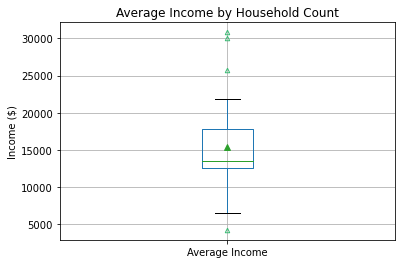

In [18]:
# Check for outliers data via box plot
flierprops = dict(marker='^', markersize=4.5, color='#3CBB75FF', markeredgecolor='#3CBB75FF')

boxplot = p_one_hhxxx.boxplot(column=['Average Income'], flierprops=flierprops, showmeans=True)

plt.title('Average Income by Household Count')
plt.ylabel('Income ($)')

plt.savefig("Images/avg_income_by_hh_box.png")

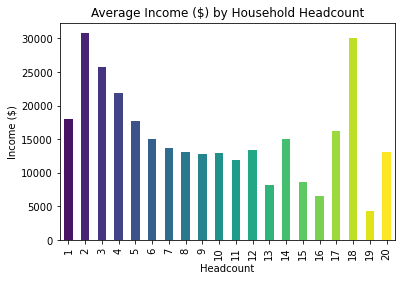

In [19]:
# Count the number of plots by headcount in a bar chart
colors =[viridis.colors[1],viridis.colors[2],viridis.colors[3],viridis.colors[4],
         viridis.colors[5],viridis.colors[6],viridis.colors[7],viridis.colors[8],
         viridis.colors[9],viridis.colors[10],viridis.colors[11],viridis.colors[12],
         viridis.colors[13],viridis.colors[14],viridis.colors[15],viridis.colors[16],
         viridis.colors[17],viridis.colors[18],viridis.colors[19],viridis.colors[20]]


ax = p_one_hh.groupby('HH Headcount')['HH Income Mean'].mean().plot(kind='bar', color=colors)
ax.set_title("Average Income ($) by Household Headcount")
ax.set_ylabel("Income ($)")
ax.set_xlabel("Headcount")
plt.savefig("Images/avgincome_hhheadct_bar.png")

plt.show()


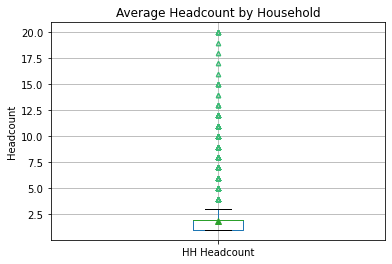

In [21]:
# Check for outliers data via box plot
flierprops = dict(marker='^', markersize=4.5, color='#3CBB75FF', markeredgecolor='#3CBB75FF')

boxplot = p_one_hh.boxplot(column=['HH Headcount'], flierprops=flierprops, showmeans=True)

plt.title('Average Headcount by Household')
plt.ylabel('Headcount')

plt.savefig("Images/avg_headcount_by_hh_box.png")

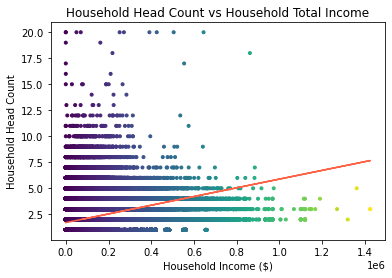

The correlation between household head count and total income is weak at 0.31.


In [23]:
## Generate a scatter plot showing household income vs household headcount
x = p_one_hh['HH Income']
y = p_one_hh['HH Headcount']

# Calculate the correlation coefficient
correlation = st.pearsonr(x, y)

# # # Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # Annotate the linear regression
# plt.annotate(line_eq,(100000.0, 20),fontsize=12,color="tomato")

# Create the plot
plt.scatter(x, y, marker='.', c=p_one_hh['HH Income'], cmap='viridis')
plt.plot(x,regress_values,"r-", color="tomato")
# plt.colorbar()
plt.title('Household Head Count vs Household Total Income')
plt.xlabel('Household Income ($)')
plt.ylabel('Household Head Count')

# Save and show
plt.savefig("Images/hh_headcountvsincome_scattera.png")
plt.show()

print(f"The correlation between household head count and total income is weak at {round(correlation[0],2)}.")

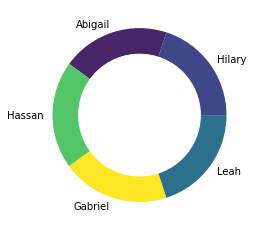

In [25]:
names=["Hilary", "Abigail", "Hassan", "Gabriel", "Leah"]
size=[100, 100, 100, 100, 100]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=names, colors=["#404788FF", "#482567FF", "#55C667FF", "#FDE725FF", "#2D708EFF"])
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.savefig("team_donut.png")
plt.show()